In [ ]:
!pip3 install pytorch-pretrained-bert
!pip3 install https://github.com/ceshine/pytorch_helper_bot/archive/0.0.4.zip
#curl -O https://github.com/google-research-datasets/gap-coreference/raw/master/gap-development.tsv -q
#curl -O https://github.com/google-research-datasets/gap-coreference/raw/master/gap-test.tsv -q
#curl -O https://github.com/google-research-datasets/gap-coreference/raw/master/gap-validation.tsv -q
#!wget https://github.com/google-research-datasets/gap-coreference/raw/master/gap-development.tsv -q
#!wget https://github.com/google-research-datasets/gap-coreference/raw/master/gap-test.tsv -q
#!wget https://github.com/google-research-datasets/gap-coreference/raw/master/gap-validation.tsv -q

!pip3 install spacy

!python3 -m spacy download en_core_web_sm
!pip3 install -q tf-models-official

!pip3 install -q -U tensorflow-text
!pip3 install dgl
!python3 -m pip install transformers
!python3 -m pip install torchvision 

     |████████████████████████████████| 123 kB 28.8 MB/s 
     |████████████████████████████████| 132 kB 86.0 MB/s 
     |████████████████████████████████| 79 kB 11.3 MB/s 
     |████████████████████████████████| 8.7 MB 62.2 MB/s 
     |████████████████████████████████| 138 kB 74.4 MB/s 
     |████████████████████████████████| 127 kB 77.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     \ 7.3 kB 5.3 MB/s
  Created wheel for PyTorchHelperBot: filename=PyTorchHelperBot-0.0.4-py3-none-any.whl size=7178 sha256=9b9637cdeafd1cc3b393ca58d9a0117529504f3f794a819607206126ce60f169
  Stored in directory: /tmp/pip-eph

     |████████████████████████████████| 2.2 MB 33.1 MB/s 
     |████████████████████████████████| 1.2 MB 89.1 MB/s 
     |████████████████████████████████| 1.1 MB 88.6 MB/s 
     |████████████████████████████████| 99 kB 779 kB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 47.8 MB 1.2 MB/s 
     |████████████████████████████████| 237 kB 54.1 MB/s 
     |████████████████████████████████| 636 kB 58.3 MB/s 
     |████████████████████████████████| 352 kB 68.1 MB/s 
     |████████████████████████████████| 90 kB 5.1 MB/s 
     |████████████████████████████████| 4.9 MB 76.8 MB/s 
     |████████████████████████████████| 462 kB 81.7 MB/s 
     |████████████████████████████████| 4.4 MB 33.7 MB/s 


In [ ]:


import numpy as np
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
import spacy
import re
import codecs
import subprocess
import lxml
from lxml.html.clean import Cleaner
import csv
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import spacy
import pandas as pd
import logging
import gc
from pathlib import Path
import pickle
import torch.nn as nn

from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold

from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf

from pytorch_pretrained_bert import BertTokenizer
from pytorch_pretrained_bert.modeling import BertModel
import torch
import torch.nn.functional as F
import torch.optim as optim

import dgl
from dgl import DGLGraph
from dgl.data import MiniGCDataset
import dgl.function as fn

from functools import partial

import collections

from torch.utils.data import TensorDataset, random_split
from pytorch_pretrained_bert.tokenization import BertTokenizer, BasicTokenizer
from helperbot import BaseBot, TriangularLR

from transformers.modeling_utils import PreTrainedModel
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import AutoModel

torch.cuda.is_available()
torch.cuda.empty_cache()
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"
device = torch.device(dev) 

     |████████████████████████████████| 4.0 MB 33.9 MB/s 
     |████████████████████████████████| 6.5 MB 37.6 MB/s 
     |████████████████████████████████| 77 kB 9.4 MB/s 
     |████████████████████████████████| 895 kB 95.5 MB/s 


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


# Nouvelle section

### IMPORT DES CVEs


In [ ]:
class CVE_import():

    def controleValiditeDonne(self,str):
        chaineToFind ="Unknown CVE ID"
        if chaineToFind in str :
            return False
        else :
            return True

    def controleScore(self,str):
        chaineToFind1 ='div class="cvssbox" style="background-color:#ff' #On cherche ici les scores supérieurs à 4 
        if chaineToFind1 in str :
            return True
        else :
            return False

    def cleaning_URLs(self, data):
        return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

    

    def cleanhtml(self, raw_html):
        CLEANR = re.compile('<.*?>') 
        cleantext = re.sub(CLEANR, '', raw_html)
        return cleantext

    def label(self, data):
        chaineToFind = "Execute Code"
        chaineToFind2 = "Gain privileges"
        if (chaineToFind in data) or (chaineToFind2 in data) :
            return " Possibilité de Ransomware avec cette faille"
        else :
            return " None " 
    
    def finRetourChariot(self, data) :
        data = data.replace("\n", "")
        data= data.replace ("  ","")
        return data


   
   
    def traiter_CVES(self):
        Label_file ="D:\database_CVE\CVE-Label.csv"
        file_label = open(Label_file,"a")


         # (REMOVE <SCRIPT> to </script> and variations)
        pattern1 = r'<[ ]*script.*?\/[ ]*script[ ]*>'  # mach any char zero or more times


        # (REMOVE HTML <STYLE> to </style> and variations)
        pattern2 = r'<[ ]*style.*?\/[ ]*style[ ]*>'  # mach any char zero or more times


        # (REMOVE HTML <META> to </meta> and variations)
        pattern3 = r'<[ ]*meta.*?>'  # mach any char zero or more times


        # (REMOVE HTML COMMENTS <!-- to --> and variations)
        pattern4 = r'<[ ]*!--.*?--[ ]*>'  # mach any char zero or more times


        # (REMOVE HTML DOCTYPE <!DOCTYPE html to > and variations)
        pattern5 = r'<[ ]*\![ ]*DOCTYPE.*?>'  # mach any char zero or more times

        for i in range (22883, 0, -1) :
            cve_url = "curl https://www.cvedetails.com/cve/CVE-2021-%d/"%i 
            print(cve_url) 
            p = subprocess.Popen(cve_url,stdout=subprocess.PIPE)
            result = p.communicate()
            url = result[0].decode('utf-8')
            if self.controleValiditeDonne(url) == True:
                if self.controleScore(url) == True:
            
                    url = re.sub(pattern1, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                    url = re.sub(pattern2, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                    url = re.sub(pattern3, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                    url = re.sub(pattern4, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                    url = re.sub(pattern5, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))

                    url= self.cleaning_URLs(url)
                    url = self.cleanhtml(url)

                    url= self.finRetourChariot(url)

                    file_name ="D:\database_CVE\CVE-2021-%d.txt"%i
                    file = open(file_name,"x")
                    file.write(url)
                    file.close()
                    myLabel= self.label(url)
                    couple="CVE-2021-%d;"%i
                    couple=couple+myLabel+"\n"
                    file_label.write(couple)
            
            #df = pd.read_html(url)
            #print (df)
            #Cve_valide.append(df)

        file_label.close()

    def nettoyer_CVE_id(self, CVE_num):
      #CVE_NUM est sous la forme
                cve_url_var= "https://www.cvedetails.com/cve/CVE-%s/"%CVE_num
                cve_url = !curl -s '$cve_url_var'
                #print(cve_url) 
                url = ""
                for strr in cve_url:
                  url= url+strr
                
                #print(url)
                # (REMOVE <SCRIPT> to </script> and variations)
                pattern1 = r'<[ ]*script.*?\/[ ]*script[ ]*>'  # mach any char zero or more times


                # (REMOVE HTML <STYLE> to </style> and variations)
                pattern2 = r'<[ ]*style.*?\/[ ]*style[ ]*>'  # mach any char zero or more times


                # (REMOVE HTML <META> to </meta> and variations)
                pattern3 = r'<[ ]*meta.*?>'  # mach any char zero or more times


                # (REMOVE HTML COMMENTS <!-- to --> and variations)
                pattern4 = r'<[ ]*!--.*?--[ ]*>'  # mach any char zero or more times


                # (REMOVE HTML DOCTYPE <!DOCTYPE html to > and variations)
                pattern5 = r'<[ ]*\![ ]*DOCTYPE.*?>'  # mach any char zero or more times
                if self.controleValiditeDonne(self,url) == True:
                    if self.controleScore(self,url) == True:

                      
                        url = re.sub(pattern1, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                        url = re.sub(pattern2, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                        url = re.sub(pattern3, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                        url = re.sub(pattern4, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))
                        url = re.sub(pattern5, '', url, flags=(re.IGNORECASE | re.MULTILINE | re.DOTALL))

                        url= self.cleaning_URLs(self,url)
                        url = self.cleanhtml(self,url)

                        url= self.finRetourChariot(self,url)

                return url



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CVE_Data.csv to CVE_Data.csv


In [ ]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

## ne pas executer, Pour récupérer les Cves dans un fichier

In [ ]:
Concat_file ="CVEconcat.csv"
file_concat = open(Concat_file,"a")



file_LabelCsv ="CVE-Label.csv"


with open(file_LabelCsv, newline='') as id_LabelCsv:
    reader = csv.DictReader(id_LabelCsv, delimiter=';')
    for row in reader:
        #print(row['CVE_ID'], row['LABEL'])
        file_name ="D:\database_CVE\CVE\%s.txt"%row["CVE_ID"]
        print(file_name)
        file = open(file_name,"r")
        text_CVE=file.read()
        text_CVE=clean_str(text_CVE)
        ligne=row['CVE_ID']+";"+text_CVE+";"+row['LABEL']+"\n"
        file_concat.write(ligne)
        file.close()

id_LabelCsv.close()
file_concat.close()
         





FileNotFoundError: ignored

In [ ]:
df.describe()

CVE-2021-45266; None 
count                   12366
unique                  12366
top     CVE-2021-24289; None 
freq                        1

In [ ]:
# df_train = pd.read_csv("gap-test.tsv", delimiter="\t")
df_test = pd.read_csv("CVEtest.csv", delimiter=";")
print (df_test)
"""
df_train_val = pd.concat([
    pd.read_csv("D:\database_CVE\CVE", delimiter="\t"),
    pd.read_csv("D:\database_CVE\CVE-Label.csv", delimiter="\t")
], axis=0)
"""
df_train_val = pd.read_csv("CVEconcat.csv", delimiter=";",encoding='ISO-8859-1')


    CVE-2021-45266  ...                                         None 
0   CVE-2021-45105  ...                                         None 
1   CVE-2021-45102  ...                                         None 
2   CVE-2021-45101  ...                                         None 
3   CVE-2021-45100  ...                                         None 
4   CVE-2021-45096  ...                                         None 
..             ...  ...                                           ...
95  CVE-2021-44278  ...                                         None 
96  CVE-2021-44277  ...                                         None 
97  CVE-2021-44235  ...   Possibilit� de Ransomware avec cette faille
98  CVE-2021-44232  ...                                         None 
99  CVE-2021-44231  ...   Possibilit� de Ransomware avec cette faille

[100 rows x 3 columns]


EmptyDataError: ignored

## N'est plus utile dans le fonctionnement globale mais peut etre utile pour des test: Tokenization

     |████████████████████████████████| 12.0 MB 541 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:

nlp = spacy.load("en_core_web_sm")

In [ ]:
def return_token_sent(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque phrase
    return [X.text for X in doc.sents]

In [ ]:
test = "OpenSSL 1.0.2 supports SSLv2. If a client attempts to negotiate SSLv2 with a server that is configured to support both SSLv2 and more recent SSL and TLS versions then a check is made for a version rollback attack when unpadding an RSA signature. Clients that support SSL or TLS versions greater than SSLv2 are supposed to use a special form of padding. A server that supports greater than SSLv2 is supposed to reject connection attempts from a client where this special form of padding is present, because this indicates that a version rollback has occurred (i.e. both client and server support greater than SSLv2, and yet this is the version that is being requested). The implementation of this padding check inverted the logic so that the connection attempt is accepted if the padding is present, and rejected if it is absent. This means that such as server will accept a connection if a version rollback attack has occurred. Further the server will erroneously reject a connection if a normal SSLv2 connection attempt is made. Only OpenSSL 1.0.2 servers from version 1.0.2s to 1.0.2x are affected by this issue. In order to be vulnerable a 1.0.2 server must: 1) have configured SSLv2 support at compile time (this is off by default), 2) have configured SSLv2 support at runtime (this is off by default), 3) have configured SSLv2 ciphersuites (these are not in the default ciphersuite list) OpenSSL 1.1.1 does not have SSLv2 support and therefore is not vulnerable to this issue. The underlying error is in the implementation of the RSA_padding_check_SSLv23() function. This also affects the RSA_SSLV23_PADDING padding mode used by various other functions. Although 1.1.1 does not support SSLv2 the RSA_padding_check_SSLv23() function still exists, as does the RSA_SSLV23_PADDING padding mode. Applications that directly call that function or use that padding mode will encounter this issue. However since there is no support for the SSLv2 protocol in 1.1.1 this is considered a bug and not a security issue in that version. OpenSSL 1.0.2 is out of support and no longer receiving public updates. Premium support customers of OpenSSL 1.0.2 should upgrade to 1.0.2y. Other users should upgrade to 1.1.1j. Fixed in OpenSSL 1.0.2y (Affected 1.0.2s-1.0.2x)."


In [ ]:
clean_words=[]
clean_words =return_token_sent(test)

In [ ]:
clean_words

['OpenSSL',
 '1.0.2 supports SSLv2.',
 'If a client attempts to negotiate SSLv2 with a server that is configured to support both SSLv2 and more recent SSL and TLS versions then a check is made for a version rollback attack when unpadding an RSA signature.',
 'Clients that support SSL or TLS versions greater than SSLv2 are supposed to use a special form of padding.',
 'A server that supports greater than SSLv2 is supposed to reject connection attempts from a client where this special form of padding is present, because this indicates that a version rollback has occurred (i.e. both client and server support greater than SSLv2, and yet this is the version that is being requested).',
 'The implementation of this padding check inverted the logic so that the connection attempt is accepted if the padding is present, and rejected if it is absent.',
 'This means that such as server will accept a connection if a version rollback attack has occurred.',
 'Further the server will erroneously reject

In [ ]:
stopwords = nlp.Defaults.stop_words


In [ ]:
def return_token(sentence):
    # Tokeniser la phrase
    doc = nlp(sentence)
    # Retourner le texte de chaque token
    return [X.text for X in doc]

In [ ]:
def clean_tokens(sentence):
  clean_sentence= list() 
  i=0
  for token in return_token(sentence):
      if token not in stopwords:
          #clean_sentence[i]=token
          
          clean_sentence.append(token)
          i=i+1
  return clean_sentence 

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

ModuleNotFoundError: No module named 'nltk'

In [ ]:
sentences = dict(("sentence_" + str(i), i**2) for i in range(len( clean_words)))
for x in range (len( clean_words)):
  #clean_sent=[]
  clean_sent=clean_tokens(clean_words[x])
  sentences["sentence_"+ str(x)]=clean_sent


NameError: ignored

In [ ]:
sentences.values()


dict_values([['OpenSSL'], ['1.0.2', 'supports', 'SSLv2', '.'], ['If', 'client', 'attempts', 'negotiate', 'SSLv2', 'server', 'configured', 'support', 'SSLv2', 'recent', 'SSL', 'TLS', 'versions', 'check', 'version', 'rollback', 'attack', 'unpadding', 'RSA', 'signature', '.'], ['Clients', 'support', 'SSL', 'TLS', 'versions', 'greater', 'SSLv2', 'supposed', 'use', 'special', 'form', 'padding', '.'], ['A', 'server', 'supports', 'greater', 'SSLv2', 'supposed', 'reject', 'connection', 'attempts', 'client', 'special', 'form', 'padding', 'present', ',', 'indicates', 'version', 'rollback', 'occurred', '(', 'i.e.', 'client', 'server', 'support', 'greater', 'SSLv2', ',', 'version', 'requested', ')', '.'], ['The', 'implementation', 'padding', 'check', 'inverted', 'logic', 'connection', 'attempt', 'accepted', 'padding', 'present', ',', 'rejected', 'absent', '.'], ['This', 'means', 'server', 'accept', 'connection', 'version', 'rollback', 'attack', 'occurred', '.'], ['Further', 'server', 'erroneously'

In [ ]:
sentences = dict(("sentence_" + str(i), i**2) for i in range(len( clean_words)))
for x in range (len( clean_words)):
  #clean_sent=[]
  clean_sent=clean_tokens(clean_words[x])
  print(clean_sent)
  clean_2_sent=[]
  for y in range (len( clean_sent)):
    print(y)
    clean_2_sent.append( return_stem(clean_sent[y]))
    print(clean_2_sent)
    
  sentences["sentence_"+ str(x)]=clean_2_sent


In [ ]:
sentences

##Mise en oeuvre de BERT Tokeniser

In [ ]:

device_name = tf.test.gpu_device_name()


"\n# The device name should look like the following:\nif device_name == '/device:GPU:0':\n    print('Found GPU at: {}'.format(device_name))\nelse:\n    raise SystemError('GPU device not found')\n"

In [ ]:


if torch.cuda.is_available():        
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")


There are 1 GPU(s) available.
We will use the GPU: Tesla T4


# Données pour l'entrainement

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CVE_Data.csv to CVE_Data (1).csv


In [ ]:
df = pd.read_csv("CVE_Data.csv", delimiter=";", header=0,dtype=None )
print('Number of training sentences: {:,}\n'.format(df.shape[0]))
df.sample(10)


Number of training sentences: 12,367



CVE_ID  label                               Ransomware_risk  \
510   CVE-2021-37662    0.0                                         None    
6862  CVE-2021-39558    1.0   Possibilité de Ransomware avec cette faille   
3647  CVE-2021-38513    0.0                                         None    
8261  CVE-2021-20757    0.0                                         None    
2294  CVE-2021-20226    0.0                                         None    
489   CVE-2021-37678    1.0   Possibilité de Ransomware avec cette faille   
6082  CVE-2021-30903    1.0   Possibilité de Ransomware avec cette faille   
6317  CVE-2021-40745    0.0                                         None    
6227  CVE-2021-35218    1.0   Possibilité de Ransomware avec cette faille   
4945  CVE-2021-26714    0.0                                         None    

                                            Description  taille description  \
510   TensorFlow is an end-to-end open source platfo...                 827   
6862  An issue was discovered in swftools through 20...                 228   
3647  Certain NETGEAR devices are affected by authen...                 344   
8261  Operational restrictions bypass vulnerability ...                 189   
2294  A use-after-free flaw was found in the io_urin...                 448   
489   TensorFlow is an end-to-end open source platfo...                 843   
6082  This issue was addressed with improved checks....                 250   
6317  Adobe Campaign version 21.2.1 (and earlier) is...                 244   
6227  Deserialization of Untrusted Data in the Web C...                 246   
4945  The Enterprise License Manager portal in Mitel...                 285   

      Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
510          NaN         NaN         NaN         NaN         NaN  ...   
6862         NaN         NaN         NaN         NaN         NaN  ...   
3647         NaN         NaN         NaN         NaN         NaN  ...   
8261         NaN         NaN         NaN         NaN         NaN  ...   
2294         NaN         NaN         NaN         NaN         NaN  ...   
489          NaN         NaN         NaN         NaN         NaN  ...   
6082         NaN         NaN         NaN         NaN         NaN  ...   
6317         NaN         NaN         NaN         NaN         NaN  ...   
6227         NaN         NaN         NaN         NaN         NaN  ...   
4945         NaN         NaN         NaN         NaN         NaN  ...   

      Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
510           NaN          NaN          NaN          NaN          NaN   
6862          NaN          NaN          NaN          NaN          NaN   
3647          NaN          NaN          NaN          NaN          NaN   
8261          NaN          NaN          NaN          NaN          NaN   
2294          NaN          NaN          NaN          NaN          NaN   
489           NaN          NaN          NaN          NaN          NaN   
6082          NaN          NaN          NaN          NaN          NaN   
6317          NaN          NaN          NaN          NaN          NaN   
6227          NaN          NaN          NaN          NaN          NaN   
4945          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  
510           NaN          NaN          NaN          NaN          NaN  
6862          NaN          NaN          NaN          NaN          NaN  
3647          NaN          NaN          NaN          NaN          NaN  
8261          NaN          NaN          NaN          NaN          NaN  
2294          NaN          NaN          NaN          NaN          NaN  
489           NaN          NaN          NaN          NaN          NaN  
6082          NaN          NaN          NaN          NaN          NaN  
6317          NaN          NaN          NaN          NaN          NaN  
6227          NaN          NaN          

In [ ]:
df.loc[df.label == 1].sample(5)[['Description', 'label']]


Description  label
1760   OpenOlat is a web-based learning management sy...    1.0
3323   Adobe After Effects version 18.2 (and earlier)...    1.0
9045   The file extension of the TadTools file upload...    1.0
6408   An issue was discovered in Bento4 through v1.6...    1.0
10313  An issue was discovered in Zammad before 4.1.1...    1.0

In [ ]:
sentences = df.Description.values
cve_Ids=df.CVE_ID.values
print (cve_Ids)
labs=[]
labels = df.label.values
print (labels)
labels=labels.astype(int)
print (labels)

['CVE-2021-31895' 'CVE-2021-41129' 'CVE-2021-41117' ... 'CVE-2021-25961'
 'CVE-2021-25966' 'CVE-2021-25962']
[1. 1. 1. ... 0. 0. 0.]
[1 1 1 ... 0 0 0]


# Résumer des CVE

In [ ]:
from transformers import BertTokenizer, pipeline
# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


summarizer = pipeline("summarization")
#summarizer.cuda()

def clean2_str(string):
   
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip()

def resumer (sentence):
    #print ("sentence : ",sentence)
    sentence=clean2_str(sentence.strip())

    #lines= sentence.splitlines() 
    lines= sentence.split(', ') 
    #print ("lines :", lines)
    i=0
    tranche=""
    tranche_resume=""
    for line in lines :
        #if (len(line)+i) < 500 :
        j=len(tokenizer.tokenize(line))
        #print ("----- j=",j)
        if j+i < 500 :
            line=line.strip()
            tranche=tranche+", "+line
            #i=i+len(line)
            i=i+j
            # print ('i=',i)
        else :
            tranche=tranche.strip()
            #print("tranche1 :",tranche,"!!!")
            print ("len tranche : ",len(tranche))
            t=len (tokenizer.tokenize(tranche))
            print ("---- t =",t)
            #if len (tranche)>100 :
            if t>200 and t<500 :
                summ=summarizer(tranche, max_length=100, min_length=20, do_sample=True)
                summ=summ[0]['summary_text']
                #print ("len Summ=",len(summ))
            else : 
                if  t<500 :
                  tranche_resume = tranche_resume+", "+tranche
                  summ=""
                else :
                  " j'ignore la chaine monolitique"
                  summ=""
            #print("summ1 : ",summ)
            tranche_resume = tranche_resume+", "+summ
            #print ("len tranche_resume : ",len(tranche_resume))
            #i=len(line)
            i=j
            print ('   i  =',i)
            tranche=line
    tranche=tranche.strip()
    t=len (tokenizer.tokenize(tranche))
    #if len (tranche)>100 :
    if (t>200) :
        #print("tranche2 :",tranche,"!!!")
        #print ("len tranche 2 : ",len(tranche))
        summ=summarizer(tranche, max_length=100, min_length=20, do_sample=True)
        summ=summ[0]['summary_text']
        print ("len 2 Summ=",len(summ))
        #print("summ2 : ",summ)
    else :
        summ=tranche.strip()
    tranche_resume = tranche_resume+", "+summ
    #print ("!!!",tranche_resume,"!!!")
    #print ("len tranche_resume 2 : ",len(tranche_resume))
    r= len(tokenizer.tokenize(tranche_resume))
    #if len(tranche_resume) >500 :
    if r >500 :
        print ("appel resumer ")
        tranche_resume=resumer(tranche_resume.strip())
    return tranche_resume 






Loading BERT tokenizer...


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [ ]:
Summ_file ="CVEsummmTer.csv"
file_resume = open(Summ_file,"a")

ligne="CVE_ID;Description\n"
file_resume.write(ligne)

# For every sentence...
k=0
indice_resume=0
resume_n=[]
for sent in sentences:

    if len(tokenizer.tokenize(sent))>500 :
        print ("-- $$  appel initiale de resumer k=",k)
        sent=resumer(sent) 
        resume_n.append(sent)  
        indice_resume=indice_resume+1    
        ligne=cve_Ids[k]+";"+sent+"\n"
        file_resume.write(ligne)
    k=k+1

file_resume.close()

-- $$  appel initiale de resumer k= 0
len tranche :  1185
---- t = 512
   i  = 27
len tranche :  1143
---- t = 519
   i  = 23
len 2 Summ= 159
-- $$  appel initiale de resumer k= 1
len tranche :  2516
---- t = 502
   i  = 62
-- $$  appel initiale de resumer k= 2
len tranche :  1826
---- t = 476
   i  = 234
len 2 Summ= 126
-- $$  appel initiale de resumer k= 3
len tranche :  1938
---- t = 514
   i  = 29
-- $$  appel initiale de resumer k= 4
len 2 Summ= 382
-- $$  appel initiale de resumer k= 5
len tranche :  2052
---- t = 541
   i  = 21
-- $$  appel initiale de resumer k= 6
len tranche :  1751
---- t = 441
   i  = 145
-- $$  appel initiale de resumer k= 9
len tranche :  2065
---- t = 470
   i  = 58
-- $$  appel initiale de resumer k= 11
len tranche :  1065
---- t = 532
   i  = 12
len tranche :  956
---- t = 535
   i  = 12
-- $$  appel initiale de resumer k= 13
len tranche :  1778
---- t = 538
   i  = 17
-- $$  appel initiale de resumer k= 14
len tranche :  1787
---- t = 473
   i  = 48
--

# Préparation des données

In [ ]:
print(' Original: ', sentences[0])
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


 Original:  A vulnerability has been identified in RUGGEDCOM ROS M2100 (All versions < V4.3.7), RUGGEDCOM ROS M2200 (All versions < V4.3.7), RUGGEDCOM ROS M969 (All versions < V4.3.7), RUGGEDCOM ROS RMC (All versions < V4.3.7), RUGGEDCOM ROS RMC20 (All versions < V4.3.7), RUGGEDCOM ROS RMC30 (All versions < V4.3.7), RUGGEDCOM ROS RMC40 (All versions < V4.3.7), RUGGEDCOM ROS RMC41 (All versions < V4.3.7), RUGGEDCOM ROS RMC8388 V4.X (All versions < V4.3.7), RUGGEDCOM ROS RMC8388 V5.X (All versions < V5.5.4), RUGGEDCOM ROS RP110 (All versions < V4.3.7), RUGGEDCOM ROS RS400 (All versions < V4.3.7), RUGGEDCOM ROS RS401 (All versions < V4.3.7), RUGGEDCOM ROS RS416 (All versions < V4.3.7), RUGGEDCOM ROS RS416v2 V4.X (All versions < V4.3.7), RUGGEDCOM ROS RS416v2 V5.X (All versions < 5.5.4), RUGGEDCOM ROS RS8000 (All versions < V4.3.7), RUGGEDCOM ROS RS8000A (All versions < V4.3.7), RUGGEDCOM ROS RS8000H (All versions < V4.3.7), RUGGEDCOM ROS RS8000T (All versions < V4.3.7), RUGGEDCOM ROS RS90

In [ ]:
max_len = 0
s=0
# For every sentence...
for sent in sentences:

    if len(tokenizer.tokenize(sent))>500 :
        print ("-- $$  appel phrase resumée s=",s)
        sent=resume_n[s]
        #print(sent)   
        s+=1       
    
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True,max_length=512, truncation=True,
    padding="max_length")

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)


-- $$  appel phrase resumée s= 0
, , ,  RUGGEDCOM ROS RSG2300 V5.5.X (All versions < V4.3.7), RSG920P V5 .X (V4.4.X) RST916C (V5.4), RST2228 (v4.2.4) RSL910 (v5.1.4): RST16C (v2.2) RSC916P (v3.2), R
-- $$  appel phrase resumée s= 1
, , thusly allowing an attacker to brute force combinations until successful. This leads to a third condition that must be met: 3.) For the duration of this attack sequence the cache key being referenced must continue to exist with a valid `user_id` value. Depending on the specific key being used for this attack, this value may disappear quickly, or be changed by other random user interactions on the Panel, outside the control of the attacker. In order to mitigate this vulnerability the underlying authentication logic was changed to use an encrypted session store that the user is therefore unable to control the value of. This completely removed the use of a user-controlled value being used. In addition, the code was audited to ensure this type of vulnerabili

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
s=0
# For every sentence...
for sent in sentences:
    if len(tokenizer.tokenize(sent))>500 :
        print ("-- $$  appel phrase resumée s=",s)
        sent=resume_n[s]
        #print(sent)   
        s+=1  

    encoded_dict = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = max_len, 
                        pad_to_max_length = True, return_attention_mask = True, return_tensors = 'pt')
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask.
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print('attention_masks:', attention_masks[0])
print('labels:', labels[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


-- $$  appel phrase resumée s= 0
-- $$  appel phrase resumée s= 1
-- $$  appel phrase resumée s= 2
-- $$  appel phrase resumée s= 3
-- $$  appel phrase resumée s= 4
-- $$  appel phrase resumée s= 5
-- $$  appel phrase resumée s= 6
-- $$  appel phrase resumée s= 7
-- $$  appel phrase resumée s= 8
-- $$  appel phrase resumée s= 9
-- $$  appel phrase resumée s= 10


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


-- $$  appel phrase resumée s= 11
-- $$  appel phrase resumée s= 12
-- $$  appel phrase resumée s= 13
-- $$  appel phrase resumée s= 14
-- $$  appel phrase resumée s= 15
-- $$  appel phrase resumée s= 16
-- $$  appel phrase resumée s= 17
-- $$  appel phrase resumée s= 18
-- $$  appel phrase resumée s= 19
-- $$  appel phrase resumée s= 20
-- $$  appel phrase resumée s= 21
-- $$  appel phrase resumée s= 22
-- $$  appel phrase resumée s= 23
-- $$  appel phrase resumée s= 24
-- $$  appel phrase resumée s= 25
-- $$  appel phrase resumée s= 26
-- $$  appel phrase resumée s= 27
-- $$  appel phrase resumée s= 28
-- $$  appel phrase resumée s= 29
-- $$  appel phrase resumée s= 30
-- $$  appel phrase resumée s= 31
-- $$  appel phrase resumée s= 32
Original:  A vulnerability has been identified in RUGGEDCOM ROS M2100 (All versions < V4.3.7), RUGGEDCOM ROS M2200 (All versions < V4.3.7), RUGGEDCOM ROS M969 (All versions < V4.3.7), RUGGEDCOM ROS RMC (All versions < V4.3.7), RUGGEDCOM ROS RMC20 (All 

In [ ]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))


11,130 training samples
1,237 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
# Because of our GPU, the maximum size of batch we are able to use is 8
batch_size = 8
# We'll take training samples in random order. 
train_dataloader = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = batch_size )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(val_dataset, sampler = SequentialSampler(val_dataset), batch_size = batch_size )


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels = 2,  
    output_attentions = True,  output_hidden_states = True,)

# verifie the memory
torch.cuda.memory_summary(device=None, abbreviated=False)

# Tell pytorch to run this model on the GPU.
model.cuda()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon 
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup
# We chose to run for 5, because with 6 we start over-fitting the training data.
epochs = 5
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)


In [ ]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [ ]:
import time
import datetime

def format_time(elapsed):  
    elapsed_rounded = int(round((elapsed)))  
    return str(datetime.timedelta(seconds=elapsed_rounded))



## Training

In [ ]:
import random
import numpy as np
seed_val = 42 #random value

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode.  
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        print("progress ")
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        batch_input_ids = batch[0].to(device)  
        batch_input_mask = batch[1].to(device) 
        batch_labels = batch[2].to(device)     

        model.zero_grad()        .
        outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_input_mask, labels=batch_labels)

        # Put the training loss over all of the batches together
        logits=outputs.logits
        loss=outputs.loss
        if loss is not None :
            total_train_loss += loss.item()
            loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during the forward pass.
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_input_mask,labels=batch_labels)
 
            logits=outputs.logits
            loss=outputs.loss
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = batch_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
  Batch   760  of  1,392.    Elapsed: 0:09:36.
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
  Batch   800  of  1,392.    Elapsed: 0:10:07.
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress 
progress

# training summary

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats


Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.14     3.67e-02           0.99       0:17:34         0:00:43
2               0.05     1.09e-02           0.99       0:17:35         0:00:43
3               0.03     2.79e-03           1.00       0:17:29         0:00:42
4               0.02     7.92e-03           0.99       0:17:11         0:00:42
5               0.01     1.55e-02           0.99       0:17:09         0:00:42

# Présentaion graphique des resultats

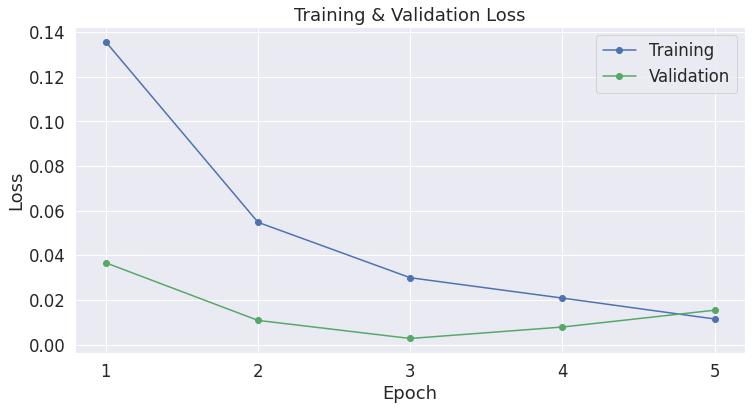

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()

# Test de prédiction 

In [ ]:


# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []
prediction_dataloader = DataLoader(val_dataset, sampler = SequentialSampler(val_dataset), batch_size = 1)

print('Predicting labels for {:,} test sentences...'.format(len(val_dataset)))

# Prediction 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  batch_input_ids, batch_input_mask, batch_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_input_mask)

  logits = outputs[0]
  
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = batch_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')
print ("predictions : ", predictions)
print ("true_labels : ", true_labels)


Predicting labels for 1,237 test sentences...
    DONE.
predictions :  [array([[ 4.88002 , -4.923276]], dtype=float32), array([[ 4.9572277, -4.9098754]], dtype=float32), array([[-4.7218404,  4.9743013]], dtype=float32), array([[ 4.9618735, -4.9334707]], dtype=float32), array([[ 4.8844366, -4.967068 ]], dtype=float32), array([[-4.6280203,  4.954144 ]], dtype=float32), array([[ 4.7935476, -4.8434954]], dtype=float32), array([[ 4.890918, -4.925581]], dtype=float32), array([[-4.7971573,  5.0158405]], dtype=float32), array([[ 4.8933787, -5.0091534]], dtype=float32), array([[ 4.6498175, -4.565413 ]], dtype=float32), array([[-4.7478013,  4.949645 ]], dtype=float32), array([[ 4.7386556, -4.627922 ]], dtype=float32), array([[ 4.967076 , -5.1056104]], dtype=float32), array([[-4.742627,  4.980729]], dtype=float32), array([[ 4.6575828, -4.479769 ]], dtype=float32), array([[ 4.8268375, -4.8503895]], dtype=float32), array([[ 4.65079 , -4.627697]], dtype=float32), array([[ 4.9674244, -5.0589447]], dt

## Matthews correlation coefficient MCC

In [ ]:
# Create a DataFrame from our training statistics.

df_prediction_data = pd.DataFrame(data=prediction_dataloader)

print(df_prediction_data)

print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))


                                                      0  \
0     [[tensor(101), tensor(18130), tensor(1999), te...   
1     [[tensor(101), tensor(25022), tensor(3215), te...   
2     [[tensor(101), tensor(1037), tensor(17698), te...   
3     [[tensor(101), tensor(2019), tensor(16542), te...   
4     [[tensor(101), tensor(1037), tensor(6556), ten...   
...                                                 ...   
1232  [[tensor(101), tensor(16542), tensor(17208), t...   
1233  [[tensor(101), tensor(1040), tensor(4213), ten...   
1234  [[tensor(101), tensor(18106), tensor(9353), te...   
1235  [[tensor(101), tensor(7513), tensor(3745), ten...   
1236  [[tensor(101), tensor(14161), tensor(14428), t...   

                                                      1            2  
0     [[tensor(1), tensor(1), tensor(1), tensor(1), ...  [tensor(0)]  
1     [[tensor(1), tensor(1), tensor(1), tensor(1), ...  [tensor(0)]  
2     [[tensor(1), tensor(1), tensor(1), tensor(1), ...  [tensor(1)]  
3     [

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). 
  # Pick the label with the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)
  print(matthews)

Calculating Matthews Corr. Coef. for each batch...
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

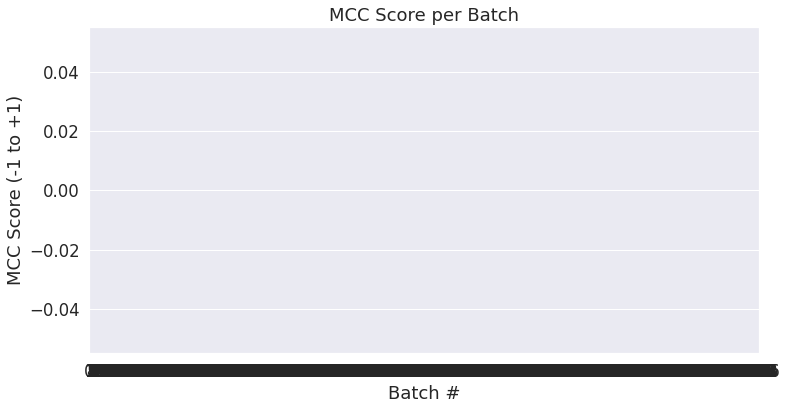

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.974


# Save fine-tunning

In [ ]:
import os

output_dir = './model_save_final/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)



Saving model to ./model_save_final/


('./model_save_final/tokenizer_config.json',
 './model_save_final/special_tokens_map.json',
 './model_save_final/vocab.txt',
 './model_save_final/added_tokens.json')

In [ ]:
!ls -l --block-size=K ./model_save_final/


total 427984K
-rw-r--r-- 1 root root      1K Apr 10 17:57 config.json
-rw-r--r-- 1 root root 427741K Apr 10 17:57 pytorch_model.bin
-rw-r--r-- 1 root root      1K Apr 10 17:57 special_tokens_map.json
-rw-r--r-- 1 root root      1K Apr 10 17:57 tokenizer_config.json
-rw-r--r-- 1 root root    227K Apr 10 17:57 vocab.txt


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l --block-size=K /content/drive/MyDrive
!cp -r ./model_save_final/ /content/drive/MyDrive/Deep-Fine-Tuning-final


total 16K
drwx------ 2 root root 4K Jan  5 09:34  Colab
drwx------ 2 root root 4K Jan  5 09:46 'Colab Notebooks'
drwx------ 3 root root 4K Mar 13 14:59  Deep-Fine-Tuning
drwx------ 2 root root 4K Apr 10 17:59  Deep-Fine-Tuning-final


In [ ]:
!ls -l --block-size=K /content/drive/MyDrive/Deep-Fine-Tuning-final

total 427973K
-rw------- 1 root root      1K Apr 10 17:59 config.json
drwx------ 2 root root      4K Apr 10 18:10 model_save_final
-rw------- 1 root root 427741K Apr 10 17:59 pytorch_model.bin
-rw------- 1 root root      1K Apr 10 17:59 special_tokens_map.json
-rw------- 1 root root      1K Apr 10 17:59 tokenizer_config.json
-rw------- 1 root root    227K Apr 10 17:59 vocab.txt


## Utilisation du modèle fine tuned




# recharger le modèle

In [ ]:
import os

output_dir = './model_save_final/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Load a trained model and vocabulary that you have fine-tuned
output_dir="/content/drive/MyDrive/Deep-Fine-Tuning-final/model_save_final/"
#model_CVE_entraine =AutoModel.from_pretrained(output_dir)
model_CVE_entraine = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Deep-Fine-Tuning-final/model_save_final/')
tokenizer_for_cve_entraine = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#tokenizer = tokenizer.from_pretrained('/content/drive/MyDrive/Deep-Fine-Tuning/model_save/')
print(model_CVE_entraine)

#model_CVE_entraine.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Commandes à éxecuter sur son poste en fonction de son OS

In [ ]:
#A FAIRE FONCTIONNER SUR SA MACHINE AFIN DE RÉCUPERER LES APPLICATIONS INSTALLÉES
#Windows
p = subprocess.Popen(["powershell","Get-WmiObject -Class Win32_Product | Select-Object -Property Name > D:\database_CVE\listes_applis-installées.txt"],stdout=subprocess.PIPE)
result = p.communicate()

In [ ]:
#Linux  : 
grep " install " /var/log/dpkg.log
grep " install " /var/log/apt/history.log
apt list --installed
dpkg-query -l
dpkg -l
snap list
flatpak list

In [ ]:
#sur Mac
find / -iname *.app > applications.txt

In [ ]:
from google.colab import files
# On télécharge donc le fichier texte des applis installées
uploaded = files.upload()

Saving listes_applis-installees.txt to listes_applis-installees (1).txt


In [ ]:
#je récupere une CVE que je nettoie
#CVE_num ="2021-34479"
CVE_num ="2015-0235"
maCVE=CVE_import.nettoyer_CVE_id(CVE_import,CVE_num)
#maCVE=clean_str(maCVE)
print(maCVE)



	CVE-2015-0235 : Heap-based buffer overflow in the __nss_hostname_digits_dots function in glibc 2.2, and other 2.x versions before 2.18, 																																																																									(e.g.: CVE-2009-1234 or 2010-1234 or 20101234)																																																	Log In				&nbsp;				Register																				&nbsp;Take a third party risk management course for FREE												Vulnerability Feeds &amp; WidgetsNew				&nbsp;				 				&nbsp;																						Switch to												Home				Browse :				Vendors				Products				Vulnerabilities By Date				Vulnerabilities By Type				Reports :				CVSS Score Report				CVSS Score Distribution				Search :				Vendor Search				Product Search				Version Search								Vulnerability Search				By Microsoft References				Top 50 :				Vendors				Vendor Cvss Scores				Products				Product Cvss Scores				Versions				Other :				Microsoft Bulletins				Bugtraq Entries				CWE Definitions				About &amp; Contact				CVE Help		

In [ ]:
# We summerize the CVE if it is too long
if len(tokenizer_for_cve_entraine.tokenize(maCVE))>500 :
            maCVE=resumer(maCVE)
            print(maCVE)   
            

# Tokenize the CVE and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
  

encoded_dict = tokenizer.encode_plus( maCVE,       # Sentence to encode.
                    add_special_tokens = True,     # Add '[CLS]' and '[SEP]'
                    max_length = 512,              # Pad & truncate all sentences.
                    pad_to_max_length = True,
                    return_attention_mask = True,  # Construct attn. masks.
                    return_tensors = 'pt',         # Return pytorch tensors.
                )

# Add the encoded sentence to the list.    
input_ids.append(encoded_dict['input_ids'])

# And its attention mask.
attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

print('Token IDs:', input_ids[0])
print('attention_masks:', attention_masks[0])



len tranche :  1211
---- t = 345
   i  = 196
len tranche :  897
---- t = 227
   i  = 1916
len tranche :  7332
---- t = 1916
   i  = 134
len 2 Summ= 273
,  Heap-based buffer overflow in the __nss_hostname_digits_dots function in glibc 2.2, and other 2.x versions before 2.18, allows context-dependent attackers to execute arbitrary code .,  CVSS Score 10.0 Confidentiality Impact Complete (There is total information disclosure, resulting in all system files being revealed) Integrity Impact Impact Complete . There is a total compromise of system integrity . Vulnerability Details at Mitre Nessus Plugins . Linux Kernel Git Repository ., ,  There are NO warranties, implied or otherwise, with regard to this information or its use . Use of this information constitutes acceptance for use in an AS IS condition . Each user is responsible for evaluating the accuracy, completeness or usefulness of any information .
Token IDs: tensor([  101,  1010, 16721,  1011,  2241, 17698,  2058, 12314,  1999,  199

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# Prédiction de la criticité de la CVE

In [ ]:
# Prediction sample

# Put model in evaluation mode
model_CVE_entraine.eval()

# Preparing data 
prediction_dataloader = DataLoader(maCVE, batch_size = 1)

print('Predicting labels for {:,} test sentences...')

# Telling the model not to compute or store gradients, saving memory and speeding up prediction
with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model_CVE_entraine(input_ids, token_type_ids=None, attention_mask=attention_masks)

logits = outputs[0]

logits = outputs.logits
# Move logits and labels to CPU
logits = logits.detach().cpu().numpy()
if logits[0][0]>0:
  vulnerabilite = "Il n'y a pas de possibilité de ransomware avec cette faille"
elif logits[0][0]<0:
  vulnerabilite = "Il y a une possibilité d'attaque ransomware avec cette faille, mettez à jour votre systeme de sécurité si besoin"

print ("PREDICTIONS : \n", vulnerabilite)


Predicting labels for {:,} test sentences...
PREDICTIONS : 
 Il y a une possibilité d'attaque ransomware avec cette faille, mettez à jour votre systeme de sécurité si besoin


# Analyse de la vulnérabilité du PC à la CVE

Utilisation d'un modlèle de question-réponse

In [ ]:

from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer, AutoTokenizer

model_QA = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [ ]:
# Use a GPU if you have one available (Runtime -> Change runtime type -> GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer_v2 = AutoTokenizer.from_pretrained("distilbert-base-uncased") 

model_QA.to(device) # Send the model to the GPU 



Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            

In [ ]:
def lecture_applis_installées(liste_applis_file):
    
  file_liste = open(liste_applis_file,"r", encoding='utf-16')
  
  liste_applis=file_liste.read()
  lignes_applis= liste_applis.split('\n') 
  file_liste.close()  
  return lignes_applis

#!ls -l

mes_applis = lecture_applis_installées("listes_applis-installees.txt")
print(mes_applis)

['', 'Name                                                              ', '----                                                              ', 'Office 16 Click-to-Run Extensibility Component                    ', 'Office 16 Click-to-Run Localization Component                     ', 'Office 16 Click-to-Run Extensibility Component 64-bit Registration', 'Office 16 Click-to-Run Licensing Component                        ', 'Microsoft .NET Framework 4.5.1 Multi-Targeting Pack               ', 'Java(TM) SE Development Kit 12.0.2 (64-bit)                       ', 'Microsoft .NET Toolset 5.0.401 (x64)                              ', 'Microsoft TestPlatform SDK Local Feed                             ', 'WinRT Intellisense IoT - en-us                                    ', 'Microsoft .NET Core AppHost Pack - 3.1.19 (x64)                   ', 'Windows SDK Modern Versioned Developer Tools                      ', 'Universal CRT Tools x64                                           ', 'MSI Developmen

In [ ]:
def predict(question, passage):
  sequence = tokenizer.encode_plus(question, passage, return_tensors="pt")['input_ids'].to(device)
  
  logits = model_QA(sequence)[0]
  probabilities = torch.softmax(logits, dim=1).detach().cpu().tolist()[0]
  proba_yes = probabilities[1]*1000
  proba_no = probabilities[0]*1000
  diff=  proba_yes -proba_no
  if diff>2:
    print(f"Question: {question}, Yes: {proba_yes}, No: {proba_no},  diff : {diff}" )


In [ ]:
from transformers import pipeline
controle_lib = pipeline("question-answering")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
print(maCVE)

,  Heap-based buffer overflow in the __nss_hostname_digits_dots function in glibc 2.2, and other 2.x versions before 2.18, allows context-dependent attackers to execute arbitrary code .,  CVSS Score 10.0 Confidentiality Impact Complete (There is total information disclosure, resulting in all system files being revealed) Integrity Impact Impact Complete . There is a total compromise of system integrity . Vulnerability Details at Mitre Nessus Plugins . Linux Kernel Git Repository ., ,  There are NO warranties, implied or otherwise, with regard to this information or its use . Use of this information constitutes acceptance for use in an AS IS condition . Each user is responsible for evaluating the accuracy, completeness or usefulness of any information .


# Controler la vulnérabilité de la machine

In [ ]:
def build_a_question(libName):
  #on construit les questions en anglais car le modele est entrainé sur la langue anglaise car c'est aussi le language par lequel sont rédigées les CVEs
  question = "is %s in the text ?"%libName
  #print(question)
  return question

for lib in mes_applis:
  ma_question = build_a_question(lib)
  #print(ma_question)
  #predict(ma_question, maCVE)
  result = controle_lib (question=ma_question, context=maCVE)
  if result['score']>0.2:
    print(f"Question:{ma_question}, Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Question:is Microsoft .NET Core AppHost Pack - 3.1.19 (x64_x86)                in the text ?, Answer: 'Linux Kernel Git Repository', score: 0.2764, start: 455, end: 482
Question:is Microsoft .NET Core AppHost Pack - 3.1.19 (x64_arm)                in the text ?, Answer: 'Linux Kernel Git Repository', score: 0.2449, start: 455, end: 482
Question:is Microsoft .NET Core AppHost Pack - 3.1.19 (x64_arm64)              in the text ?, Answer: 'Linux Kernel Git Repository', score: 0.2408, start: 455, end: 482
